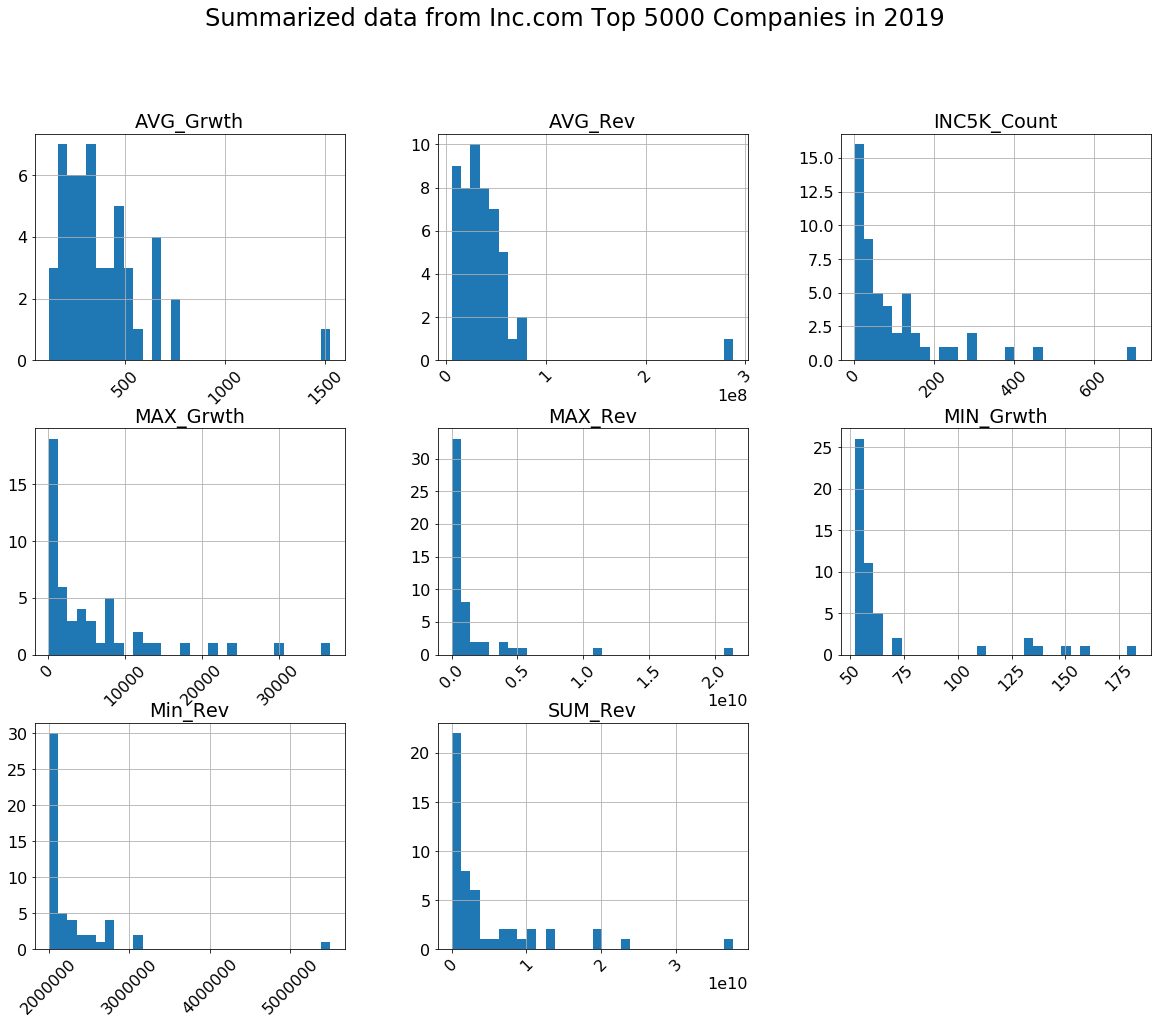

In [158]:
import pandas as pd
import glob
import pylab as pl
from matplotlib import pyplot as plt

path = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\INC5000.csv'
path2 = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\US_MEDIAN_EARNINGS.csv'
path3 = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\US_POP_2018.csv'
path4 = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\urbanization-state.csv'
path5 = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\POP_25over_EDucation_Attained.csv'
path6 = r'C:\Users\dca80\Desktop\DATA\CAPSTONE\MERGE\INCOME_PVRTY_RAT_Under_1.csv'
INC5000 = pd.read_csv(path)
EARNINGS = pd.read_csv(path2)
POP = pd.read_csv(path3)
URBAN = pd.read_csv(path4)
EDUCATION = pd.read_csv(path5)
POVERTY = pd.read_csv(path6)

INC5000.hist(bins=30, figsize=(20, 15), xrot = 45)
plt.suptitle('Summarized data from Inc.com Top 5000 Companies in 2019', va = 'baseline', size = 24)
plt.rcParams.update({'font.size':16})




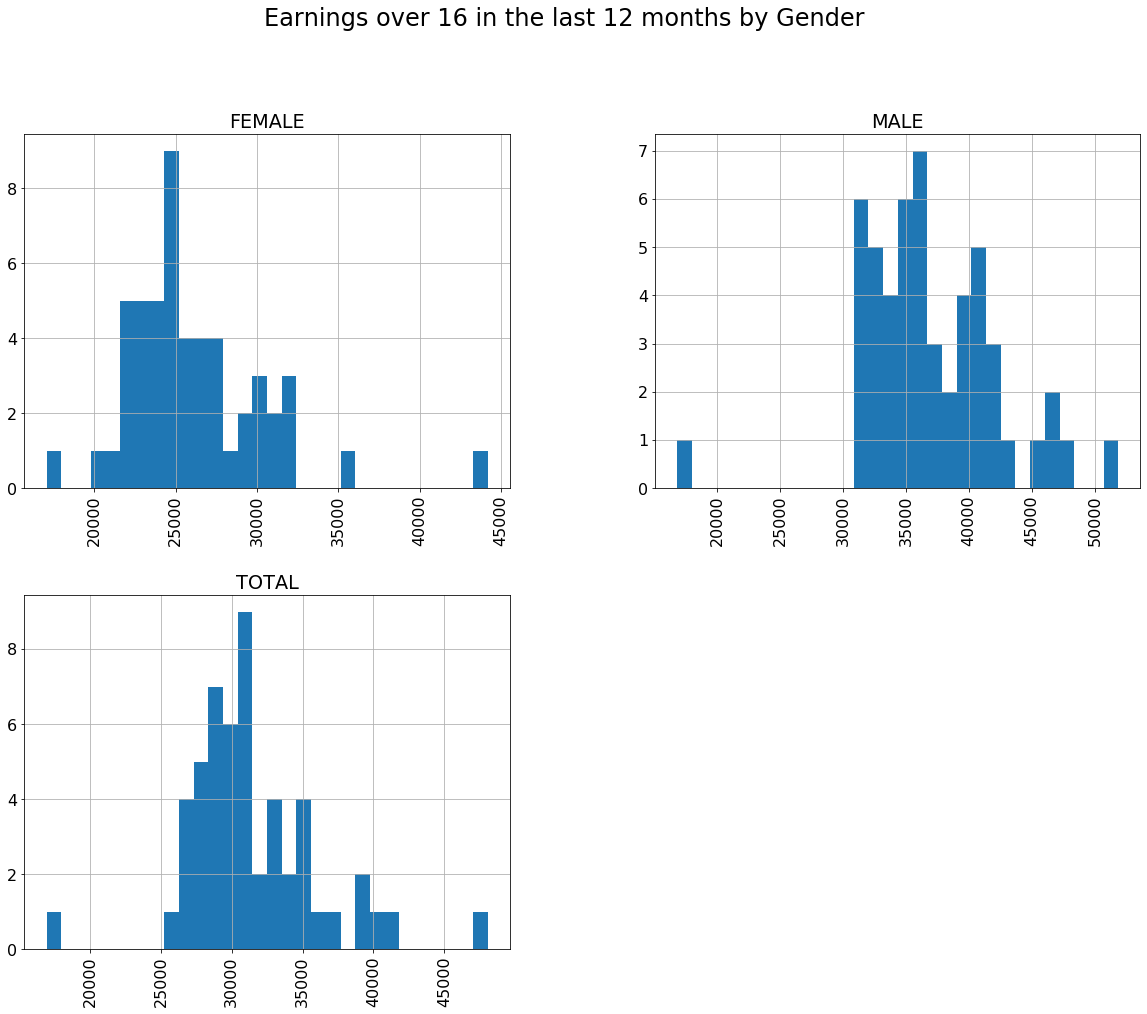

In [103]:
EARNINGS.drop('StateFIPS',axis=1).hist(bins=30, figsize=(20, 15), xrot = 90)
plt.suptitle('Earnings over 16 in the last 12 months by Gender', va = 'baseline', size = 24)
plt.rcParams.update({'font.size':16})


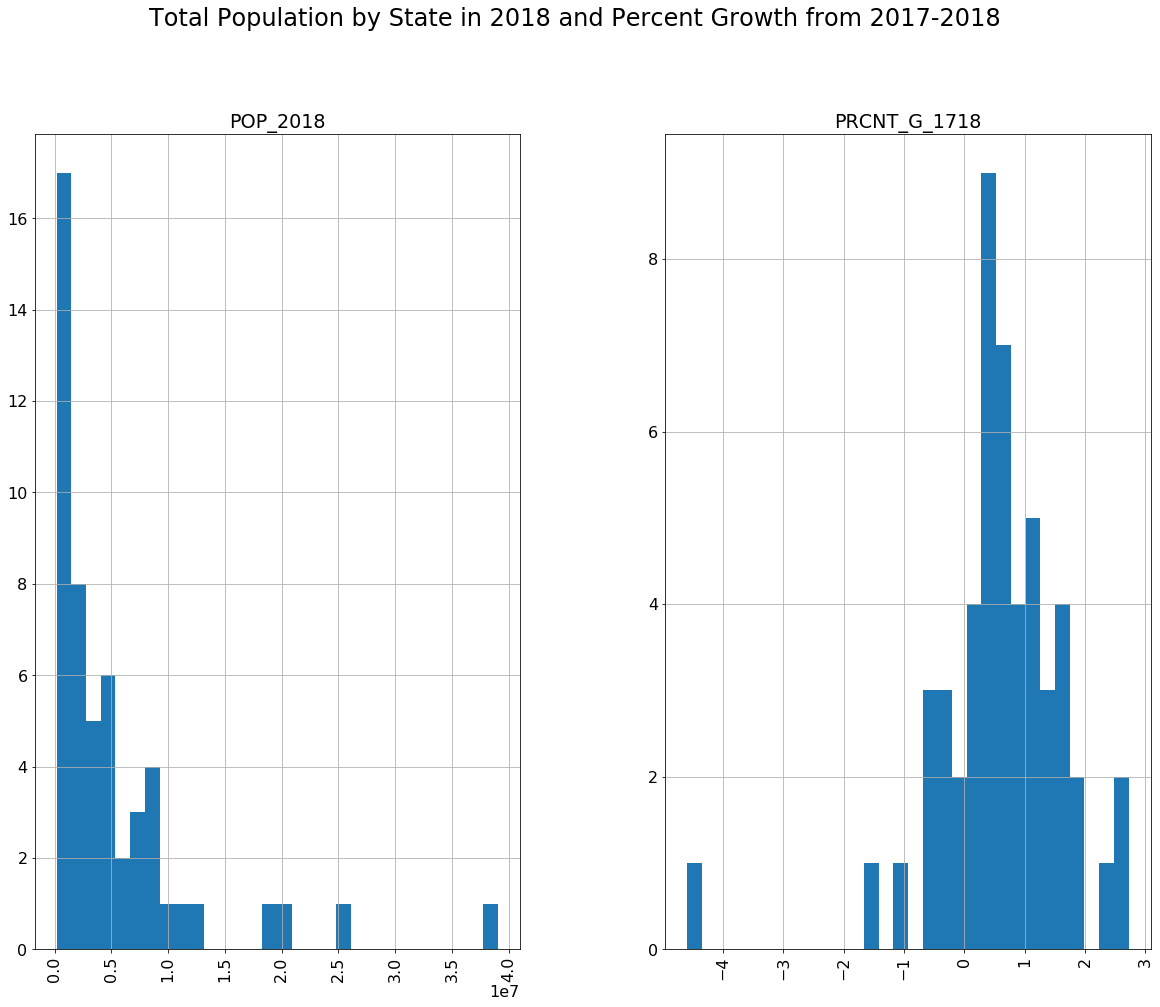

In [102]:
POP.hist(bins=30, figsize=(20, 15), xrot = 90)
plt.suptitle('Total Population by State in 2018 and Percent Growth from 2017-2018', va = 'baseline', size = 24)
plt.rcParams.update({'font.size':16})

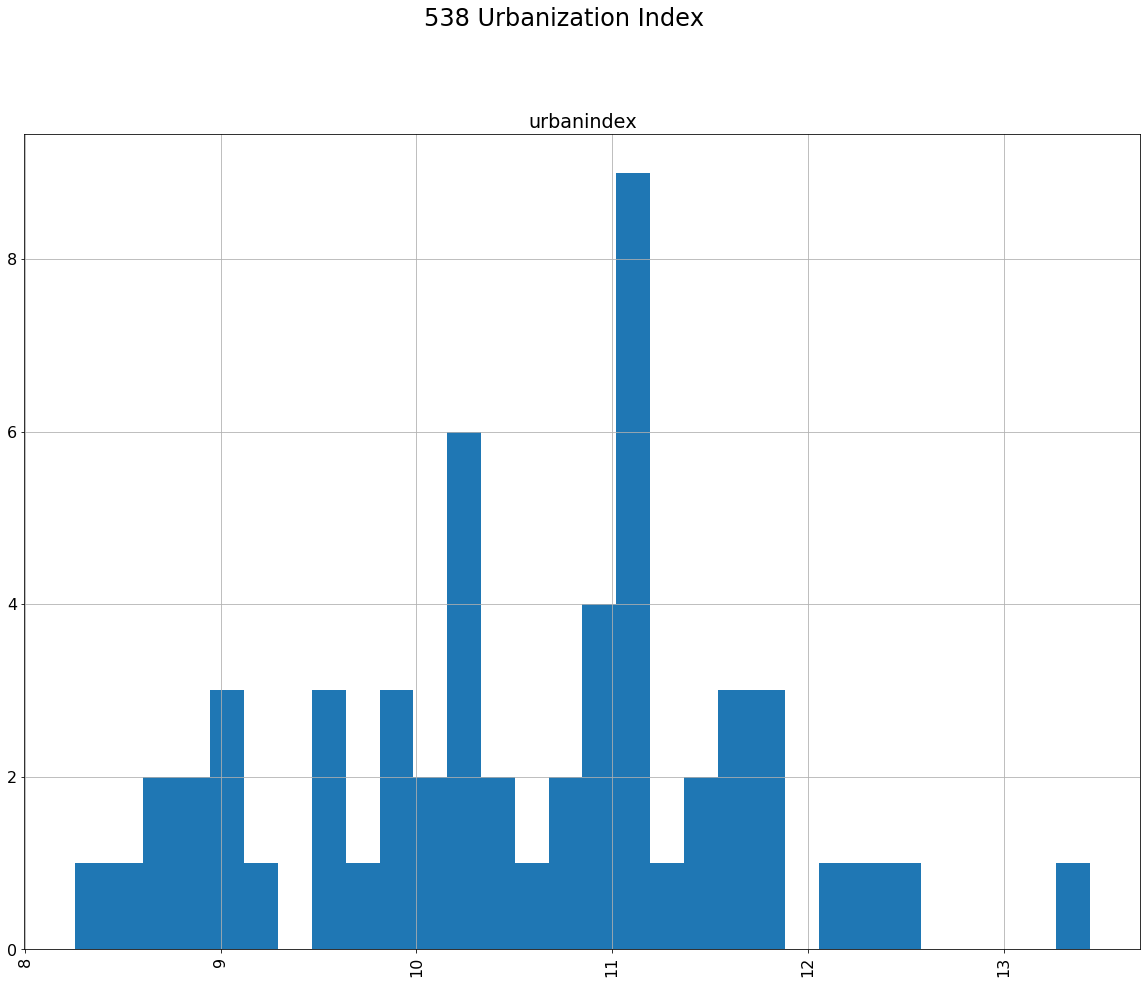

In [33]:
URBAN.hist(bins=30, figsize=(20, 15), xrot = 90)
plt.suptitle('538 Urbanization Index', va = 'baseline', size = 24)
plt.rcParams.update({'font.size':16})

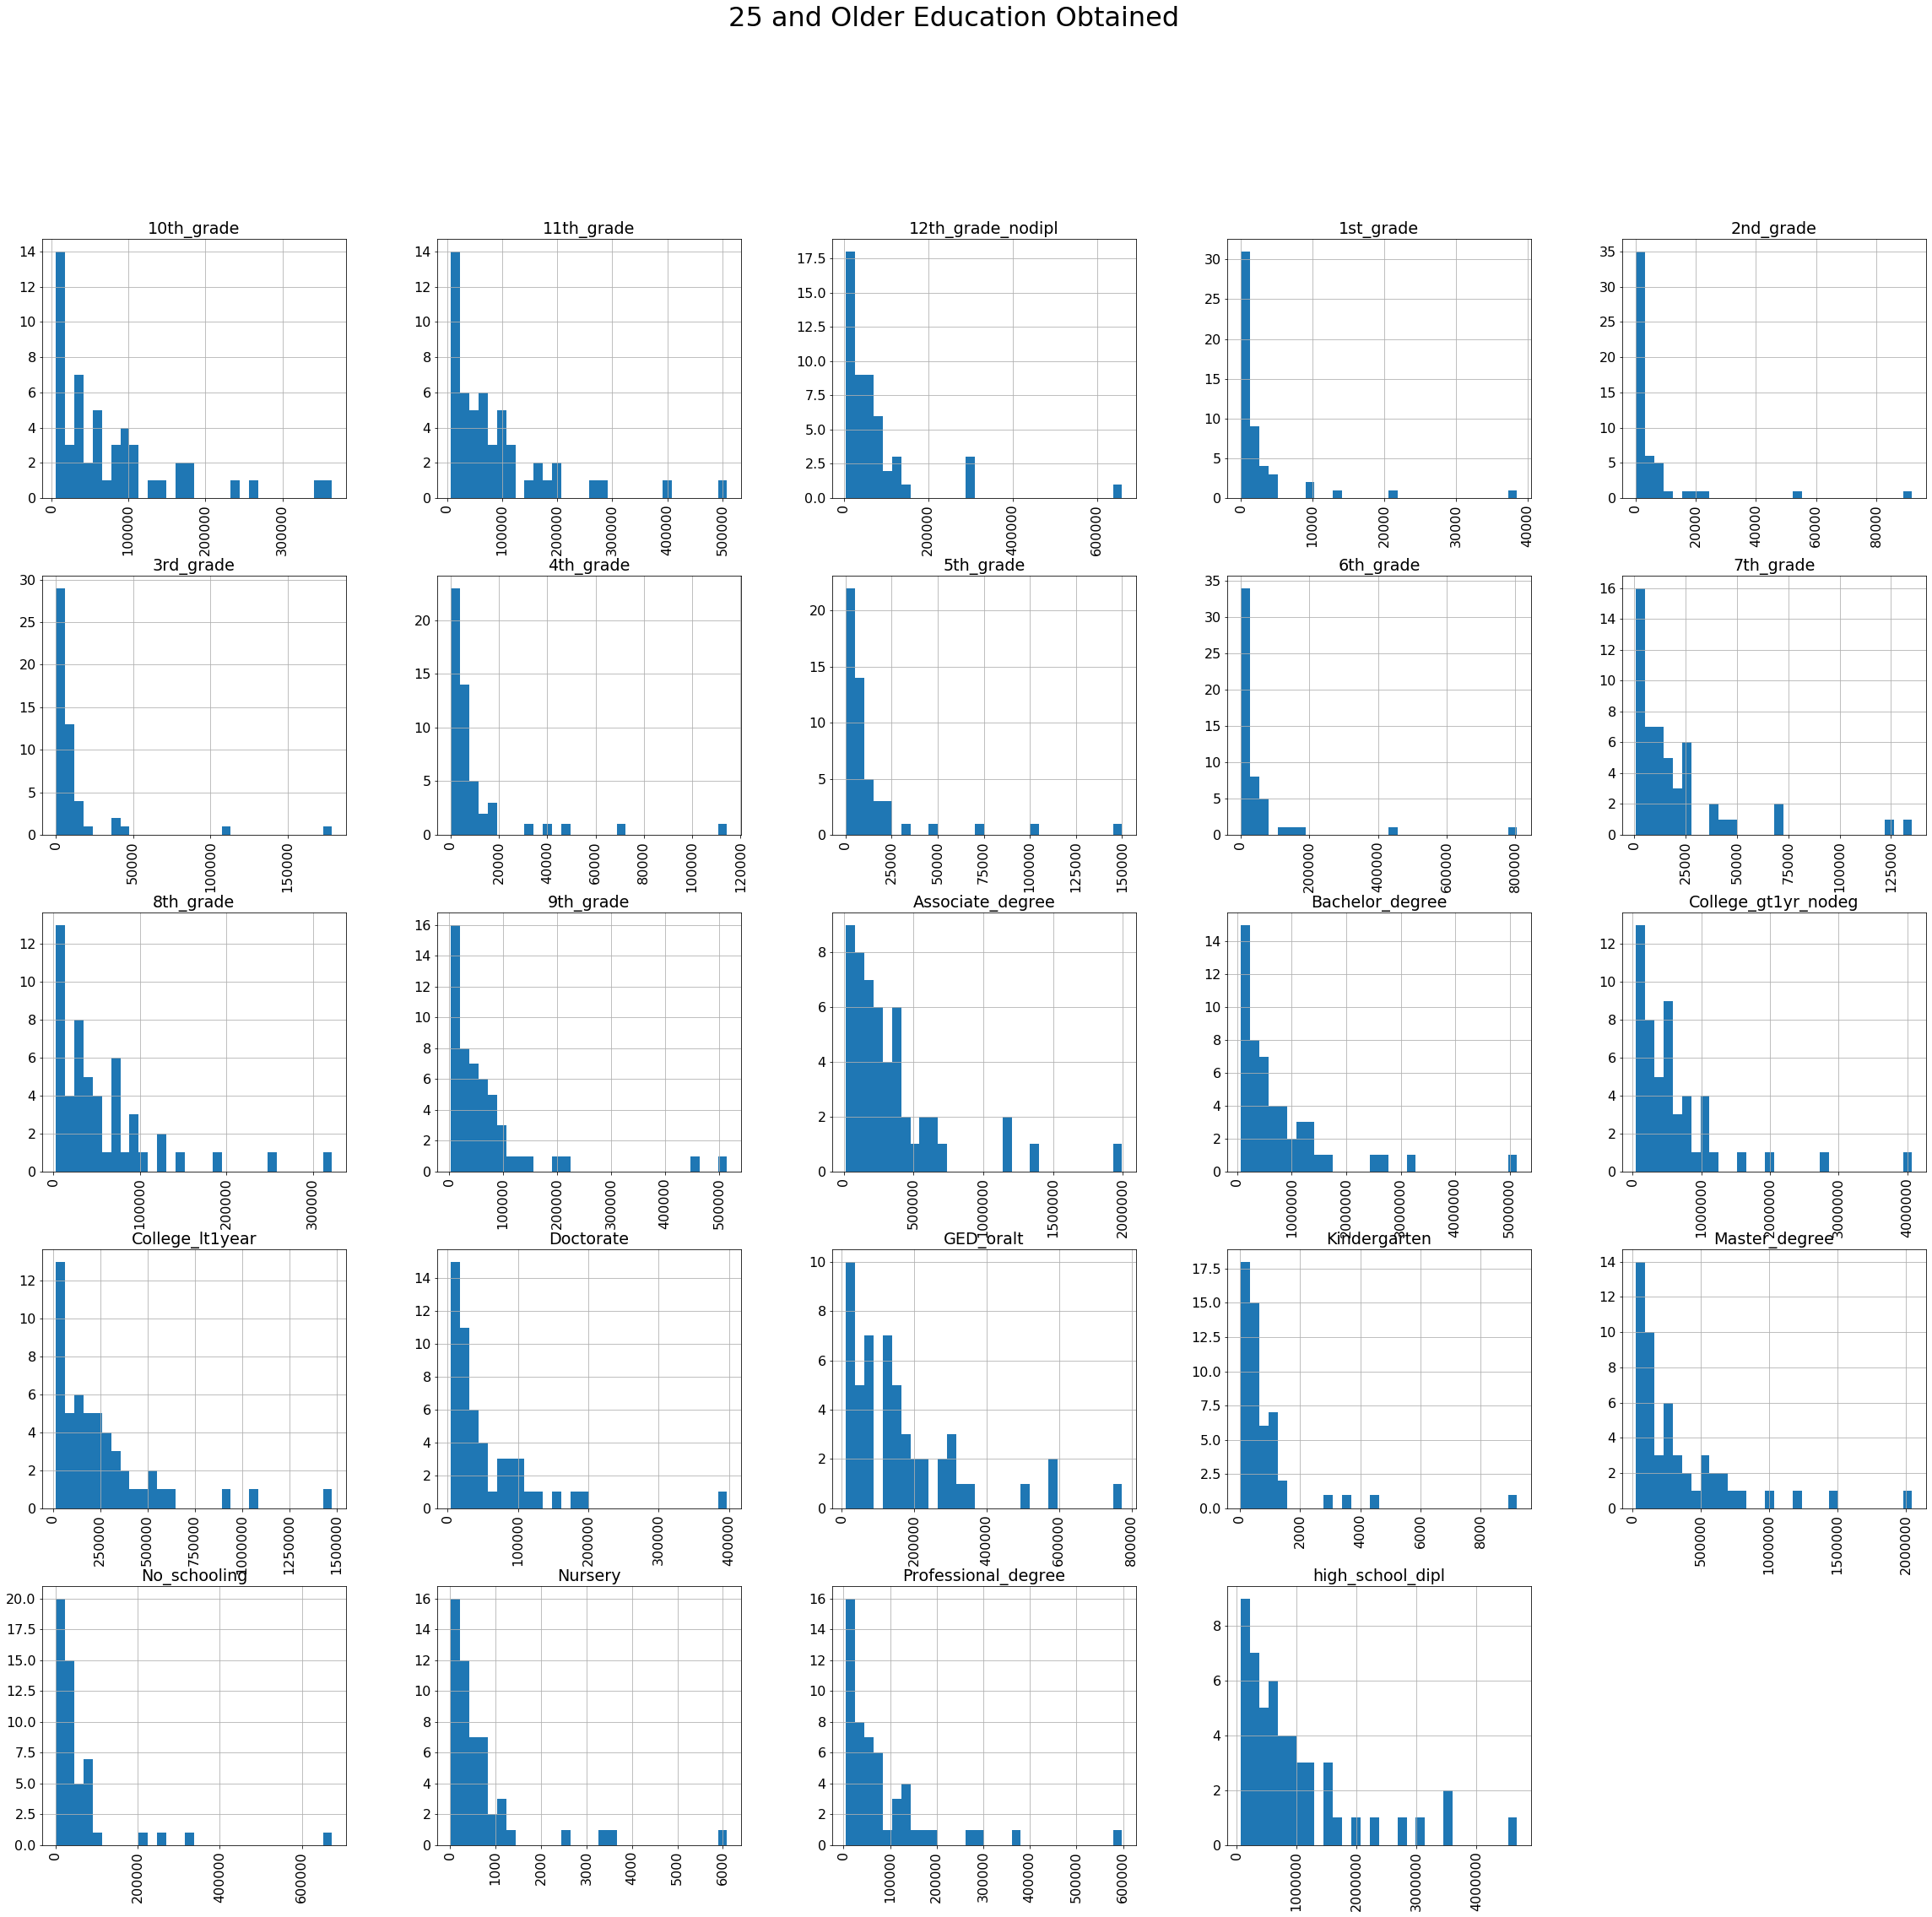

In [159]:
EDCTN = EDUCATION.drop(['StateFIPS','Total'], axis=1)
EDCTN.hist(bins=30, figsize=(40, 35), xrot = 90)
plt.suptitle('25 and Older Education Obtained', va = 'baseline', size = 32)
plt.rcParams.update({'font.size':16})


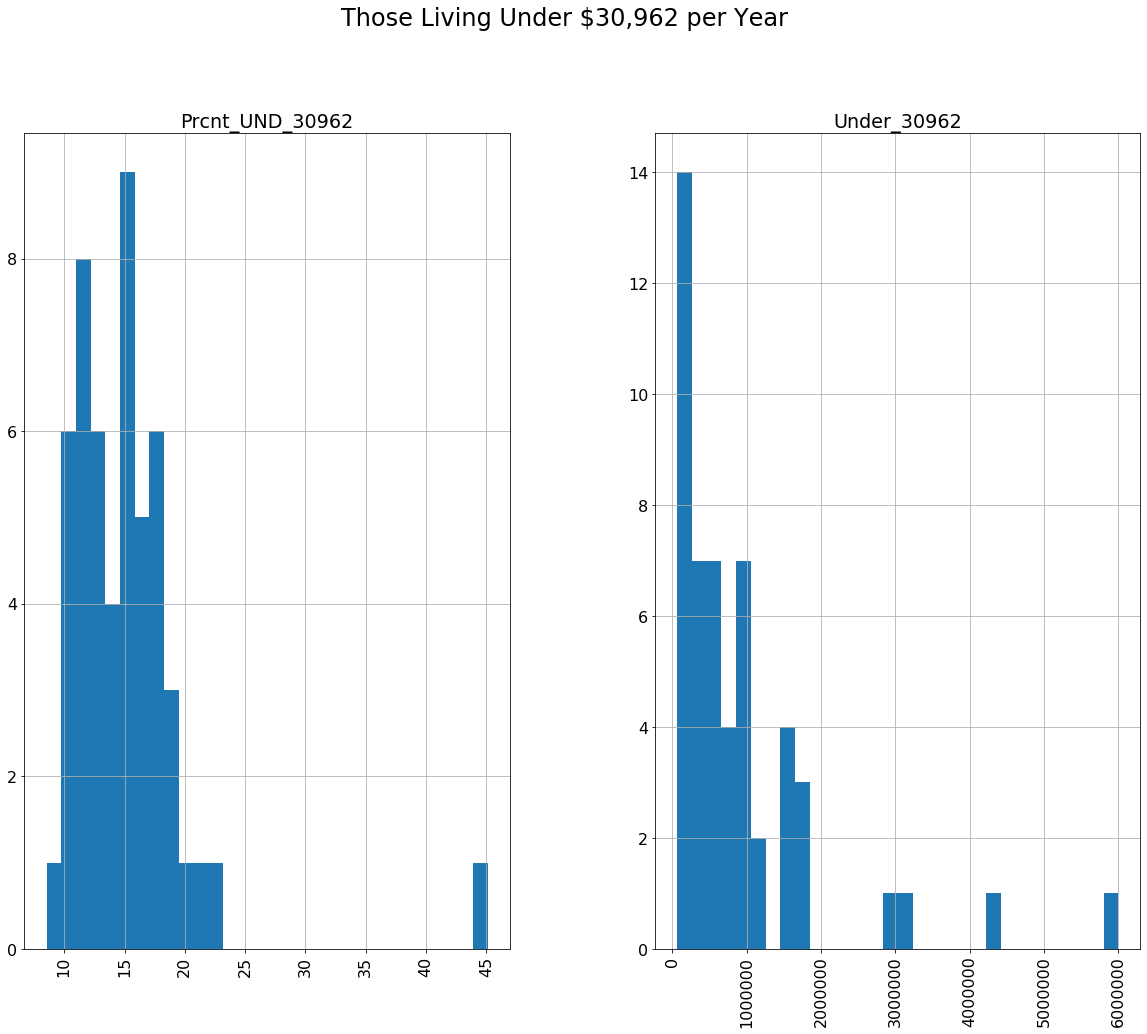

In [162]:
POVERTY.drop('StateFIPS',axis=1).hist(bins=30, figsize=(20, 15), xrot = 90)
plt.suptitle('Those Living Under $30,962 per Year', va = 'baseline', size = 24)
plt.rcParams.update({'font.size':16})

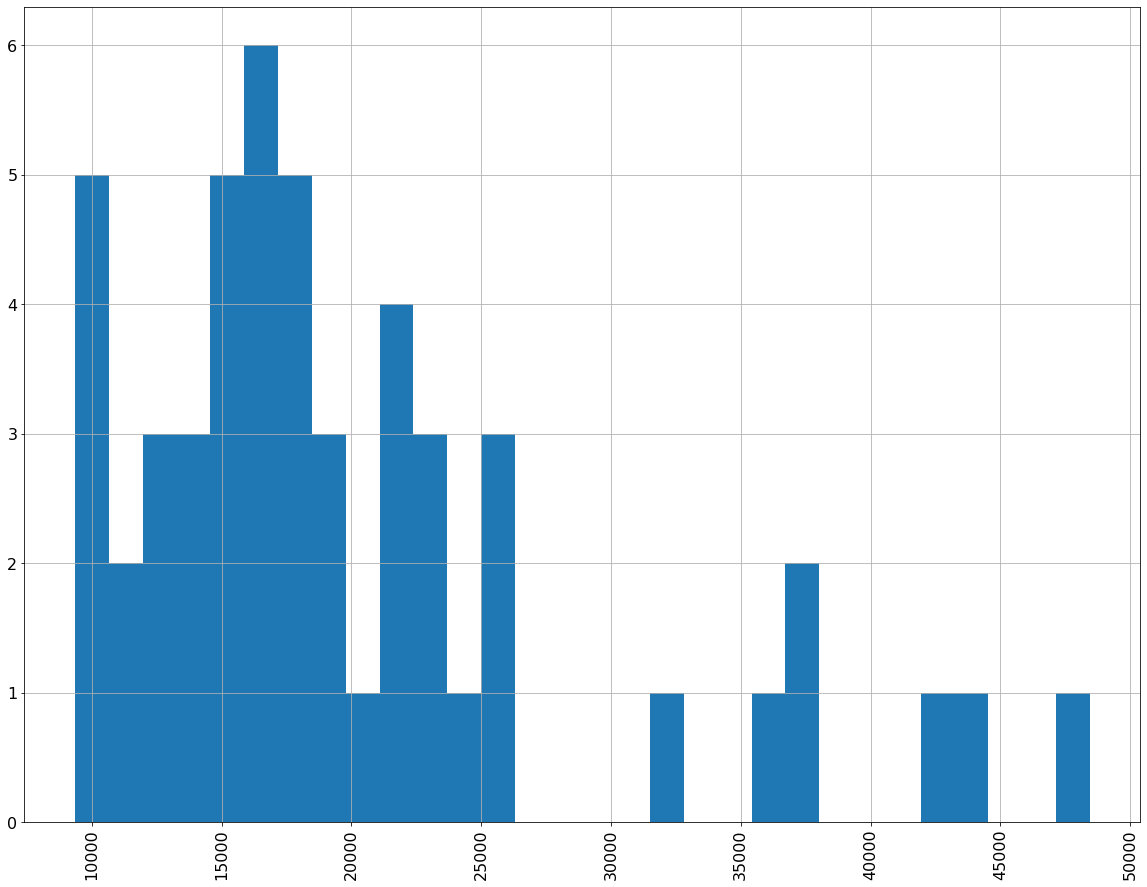

In [160]:
POV_CALC = POVERTY.drop(['StateFIPS','Prcnt_UND_30962'],axis=1)
POV_POP = pd.merge(POV_CALC,POP, on = 'state', how = 'outer')

POV_POP['under_thrsh_pr100k']=pd.eval('(POV_POP.Under_30962/POV_POP.POP_2018)*100000')
POV_POP['under_thrsh_pr100k'].drop(POV_POP.index[39]).hist(bins=30, figsize=(20, 15), xrot = 90)

                   state  high_school_dipl  No_schooling  Master_degree  \
0                Alabama            828205         42577         208839   
1                 Alaska            106169          3020          35423   
2                Arizona            898657         62538         333226   
3               Arkansas            561132         23010         108055   
4             California           4678279        673089        2045487   
5               Colorado            639310         32415         376273   
6            Connecticut            593793         24315         300566   
7   District of Columbia             71315          5004          90366   
8               Delaware            176928          7100          57237   
9                Florida           3516434        205055         972529   
10               Georgia           1528586         88872         515377   
11                Hawaii            248106         10437          67433   
12                 Idaho 

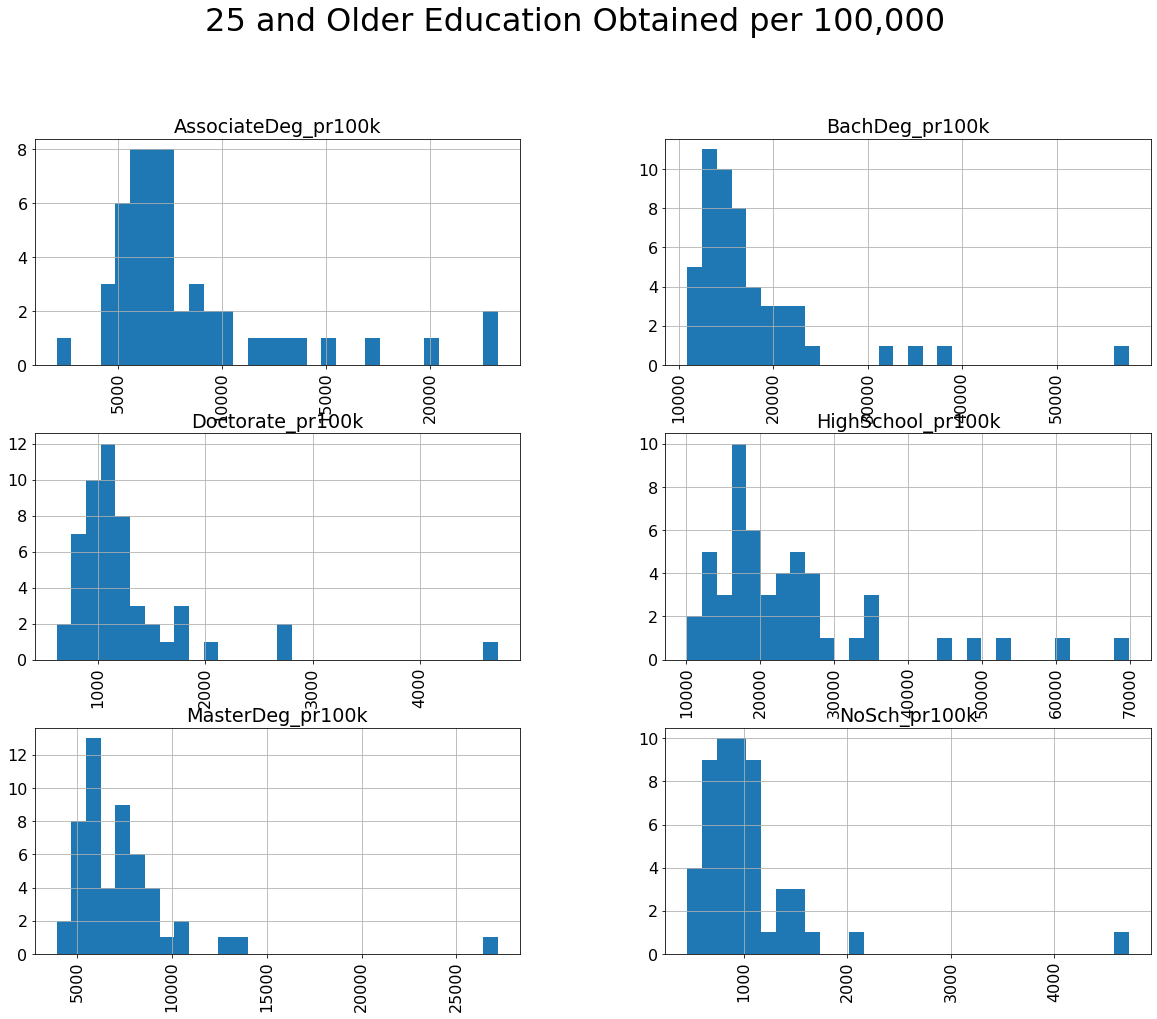

In [151]:

columns = ["state","high_school_dipl","No_schooling","Master_degree","Associate_degree","Bachelor_degree","Doctorate"]
columns2 = ['state','HighSchool_pr100k','NoSch_pr100k','MasterDeg_pr100k','AssociateDeg_pr100k','BachDeg_pr100k','Doctorate_pr100k']
TRG_EDCTN = EDUCATION.loc[:,columns]
TRG_EDCTN_POP = pd.merge(TRG_EDCTN,POP, on = 'state', how = 'outer')
print(TRG_EDCTN_POP)

TRG_EDCTN_POP['HighSchool_pr100k']=pd.eval('(TRG_EDCTN_POP.high_school_dipl/TRG_EDCTN_POP.POP_2018)*100000')
TRG_EDCTN_POP['NoSch_pr100k']=pd.eval('(TRG_EDCTN_POP.No_schooling/TRG_EDCTN_POP.POP_2018)*100000')
TRG_EDCTN_POP['MasterDeg_pr100k']=pd.eval('(TRG_EDCTN_POP.Master_degree/TRG_EDCTN_POP.POP_2018)*100000')
TRG_EDCTN_POP['AssociateDeg_pr100k']=pd.eval('(TRG_EDCTN_POP.Associate_degree/TRG_EDCTN_POP.POP_2018)*100000')
TRG_EDCTN_POP['BachDeg_pr100k']=pd.eval('(TRG_EDCTN_POP.Bachelor_degree/TRG_EDCTN_POP.POP_2018)*100000')
TRG_EDCTN_POP['Doctorate_pr100k']=pd.eval('(TRG_EDCTN_POP.Doctorate/TRG_EDCTN_POP.POP_2018)*100000')

TRG_EDC_POP_Per100K=TRG_EDCTN_POP.loc[:,columns2]
print(TRG_EDC_POP_Per100K)
TRG_EDC_POP_Per100K.hist(bins=30, figsize=(20, 15), xrot = 90)
plt.suptitle('25 and Older Education Obtained per 100,000', va = 'baseline', size = 32)
plt.rcParams.update({'font.size':16})

In [119]:
#shapiro-Wilk Normality Test to test the dsitribution of each variable
#Target Variables
from scipy.stats import shapiro
dataA = INC5000['AVG_Grwth']
dataB = INC5000['INC5K_Count']
#Test Variables
data1=EARNINGS['TOTAL']
data2=POP['POP_2018']
data3=POP['PRCNT_G_1718']
data4=URBAN['urbanindex']
data5=POV_POP['under_thrsh_pr100k']
data6=TRG_EDCTN_POP['HighSchool_pr100k']
data7=TRG_EDCTN_POP['NoSch_pr100k']
data8=TRG_EDCTN_POP['MasterDeg_pr100k']
data9=TRG_EDCTN_POP['AssociateDeg_pr100k']
data10 = TRG_EDCTN_POP['BachDeg_pr100k']
data11=TRG_EDCTN_POP['Doctorate_pr100k']

stat, p = shapiro(dataA)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.787, p=0.000
Not Gaussian


In [120]:
stat, p = shapiro(dataB)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.691, p=0.000
Not Gaussian


In [121]:
stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.916, p=0.001
Not Gaussian


In [122]:
stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.668, p=0.000
Not Gaussian


In [123]:
stat, p = shapiro(data3)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.877, p=0.000
Not Gaussian


In [124]:
stat, p = shapiro(data4)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.983, p=0.608
Gaussian


In [125]:
stat, p = shapiro(data5)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.581, p=0.000
Not Gaussian


In [126]:
stat, p = shapiro(data6)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.798, p=0.000
Not Gaussian


In [127]:
stat, p = shapiro(data7)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.590, p=0.000
Not Gaussian


In [128]:
stat, p = shapiro(data8)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.623, p=0.000
Not Gaussian


In [129]:
stat, p = shapiro(data9)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.771, p=0.000
Not Gaussian


In [130]:
stat, p = shapiro(data10)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.656, p=0.000
Not Gaussian


In [131]:
stat, p = shapiro(data11)
print('stat=%.3f, p=%.3f' %(stat, p))
if p > 0.05:
    print('Gaussian')
else:
    print('Not Gaussian')

stat=0.643, p=0.000
Not Gaussian
